## **Описание** **проекта**

В данном проекте планируется провести класстеризацию выбранного набора данных двумя способами - K-means и DBscan, определить смысл полученных групп, сделать выводы по результатам класстеризации.

## **Описание набора данных**



Данный набор описывает информацию о покупателях в продуктовом магазине. В нём описаны следующие характеристики:

**ID**: Уникальный идентификатор клиента

**Year_Birth**: Год рождения клиента

**Education**: Уровень образования клиента

**Marital_Status**: Семейное положение клиента

**Income**: Годовой доход клиента

**Kidhome**: Количество детей в семье клиента

**Teenhome**: Количество подростков в семье клиента

**Dt_Customer**: Дата регистрации клиента в компании

**Recency**: Количество дней с момента последней покупки клиента

**Complain**: 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

**MntWines**: Сумма, потраченная на вино за последние 2 года

**MntFruits**: Сумма, потраченная на фрукты за последние 2 года

**MntMeatProducts**: Сумма, потраченная на мясо за последние 2 года

**MntFishProducts**: Сумма, потраченная на рыбу за последние 2 года

**MntSweetProducts**: Сумма, потраченная на сладости за последние 2 года

**MntGoldProds**: Сумма, потраченная на золото за последние 2 года

**NumDealsPurchases**: Количество покупок, совершенных со скидкой

**AcceptedCmp1**: 1, если клиент принял предложение в рамках 1-й кампании, 0 в противном случае

**AcceptedCmp2**: 1, если клиент принял предложение в рамках 2-й кампании, 0 в противном случае

**AcceptedCmp3**: 1, если клиент принял предложение в рамках 3-й кампании, 0 в противном случае

**AcceptedCmp4**: 1, если клиент принял предложение в рамках 4-й кампании, 0 в противном случае

**AcceptedCmp5**: 1, если клиент принял предложение в рамках 5-й кампании, 0 в противном случае

**Response**: 1, если клиент принял предложение в последней кампании, 0 в противном случае

**NumWebPurchases**: Количество покупок, совершенных через веб-сайт компании

**NumCatalogPurchases**: Количество покупок, совершенных с использованием каталога

**NumStorePurchases**: Количество покупок, совершенных непосредственно в магазинах

**NumWebVisitsMonth**: Количество посещений веб-сайта компании за последний месяц

**Complain**: 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

##**Описание задачи класстеризации для данного набора данных.**

Выполняемая задача нацелена на выявление типичных групп покупателей. Сегментация клиентов - это практика разделения клиентов на группы, которые отражают сходство между клиентами. Я разделю клиентов на классы, чтобы модифицировать продукты и предложения в соответствии с различными потребностями и поведением клиентов. Это поможеть оптимизировать бизнес-процессы компании,сэкономит ресурсы и усилит конкурентоспособность.

##**Загрузка и предварительная обработка данных**

In [ ]:
#Импортируем нужные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
from datetime import datetime
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Загрузим данные и посмотрим на них
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#Посмотрим на некоторые статиски датафрейма
print(f'Размер датафрейма: {df.shape}\n')
df.describe()

Размер датафрейма: (2240, 29)



,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Найдем и удалим пропуски.

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Параметр "Income" отсутствует в 24 строках. Мы можем безопасно удалить эти строки, поскольку их небольшое количество.

In [ ]:
df.dropna(inplace=True)

Посмотрим на типы данных и изменим их, если нужно.

In [ ]:
df.dtypes


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Столбец Dt_Customer имеет тип object, однако он содержит DateTime - дату. Для простоты возьмем год в виде целого числа.

In [ ]:
df.Dt_Customer = pd.to_datetime(df['Dt_Customer']).dt.year
df['Dt_Customer']


0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2216, dtype: int64

Для простоты работы с колонками Education и Marital Status заменим их значения на более понятные.

In [ ]:
df.Education.replace({"Graduation": "UnderGraduate",
                      "Basic": "High School",
                      "2n Cycle":"Master"},
                      inplace=True)
df.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)


Найдем аномальные значения и удалим их. Для поиска посмотрим на boxplot.

<Axes: >

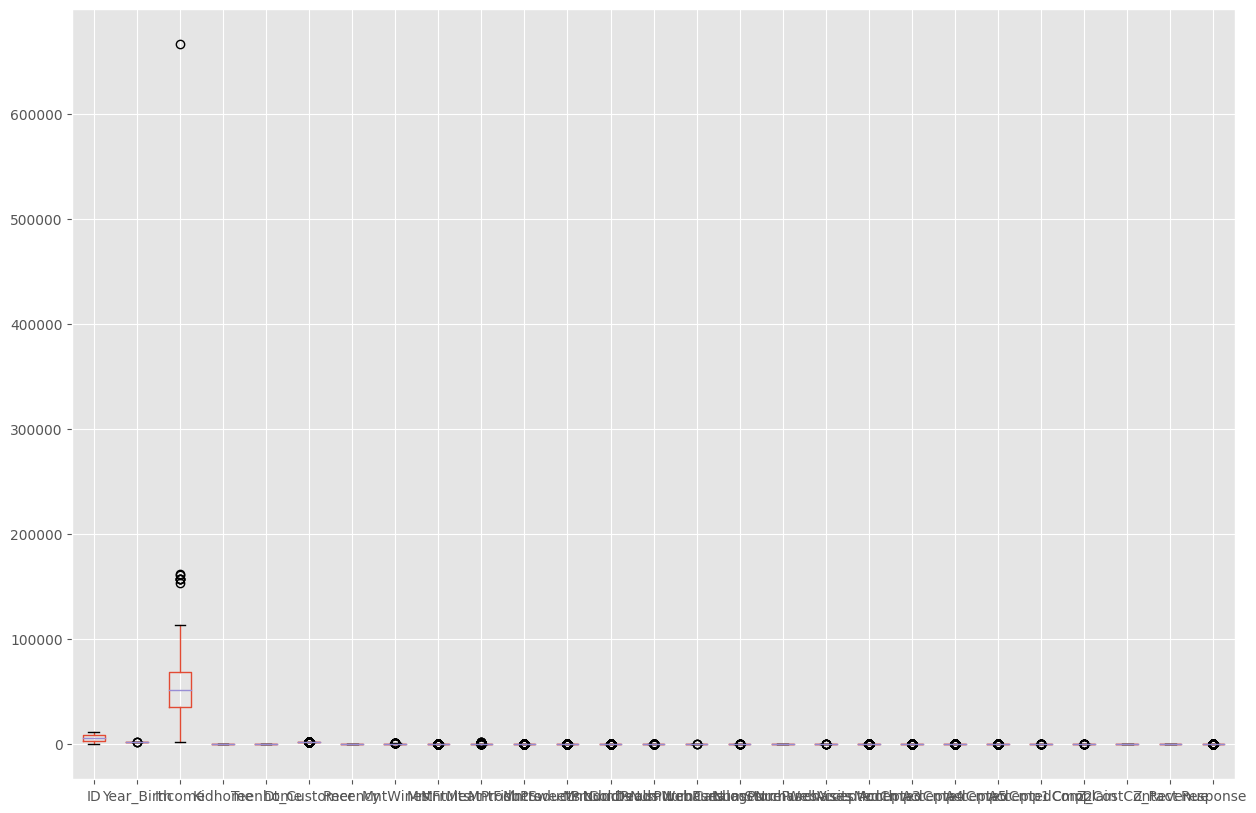

In [ ]:
df.boxplot(figsize=(15,10))

Аномальные значения присутствуют в колонках Income и Year Birth, удалим их

<Axes: >

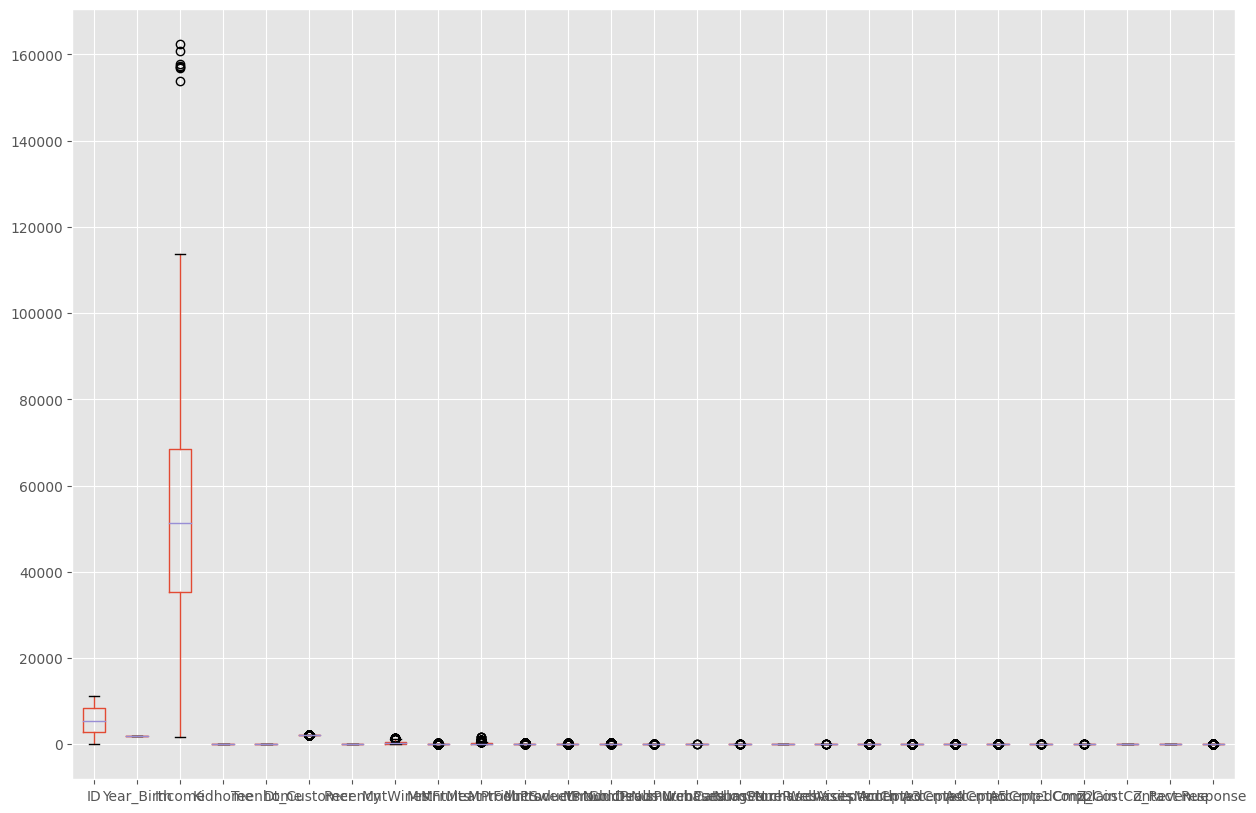

In [ ]:
df = df.loc[df.Year_Birth  >= 1935]
df = df.loc[df.Income  <= 200000]
df.boxplot(figsize=(15,10))

Удалим ненужные колонки.

In [ ]:
df.drop(columns=['ID', 'Z_Revenue', 'Z_CostContact'], inplace=True)

Переименуем колонки с непонятным названием.

In [ ]:
df.rename(columns={'Response': 'AcceptedCmpCurrent', 'Dt_Customer':'CustomerSince'}, inplace=True)

Данные изменены, предобработка завершена.

##**Функциональная обработка данных**

In [ ]:
functionalDF = df.copy()

Добавим некоторые осмысленные колонки, которые помогут нам делать выводы о класстеризации.

In [ ]:
#Количество покупок
functionalDF['NumPurchases'] = functionalDF[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

#Общая потраченная сумма
functionalDF['AmountSpent'] = functionalDF[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

#Потраченная сумма за покупку
functionalDF['AmountPerPurchase'] = functionalDF['AmountSpent'] / (functionalDF['NumPurchases'] + 1e-1)

#Количество человек в доме
functionalDF['PersonsInHome'] = functionalDF[['Kidhome', 'Teenhome']].sum(axis=1) + 2
functionalDF.loc[(functionalDF.Marital_Status == 'Single')].PersonsInHome = functionalDF.loc[(df.Marital_Status == 'Single')].PersonsInHome - 1

Наши данные не стандартизированы. Сделаем это с помощью MinMaxScaler.

<Axes: >

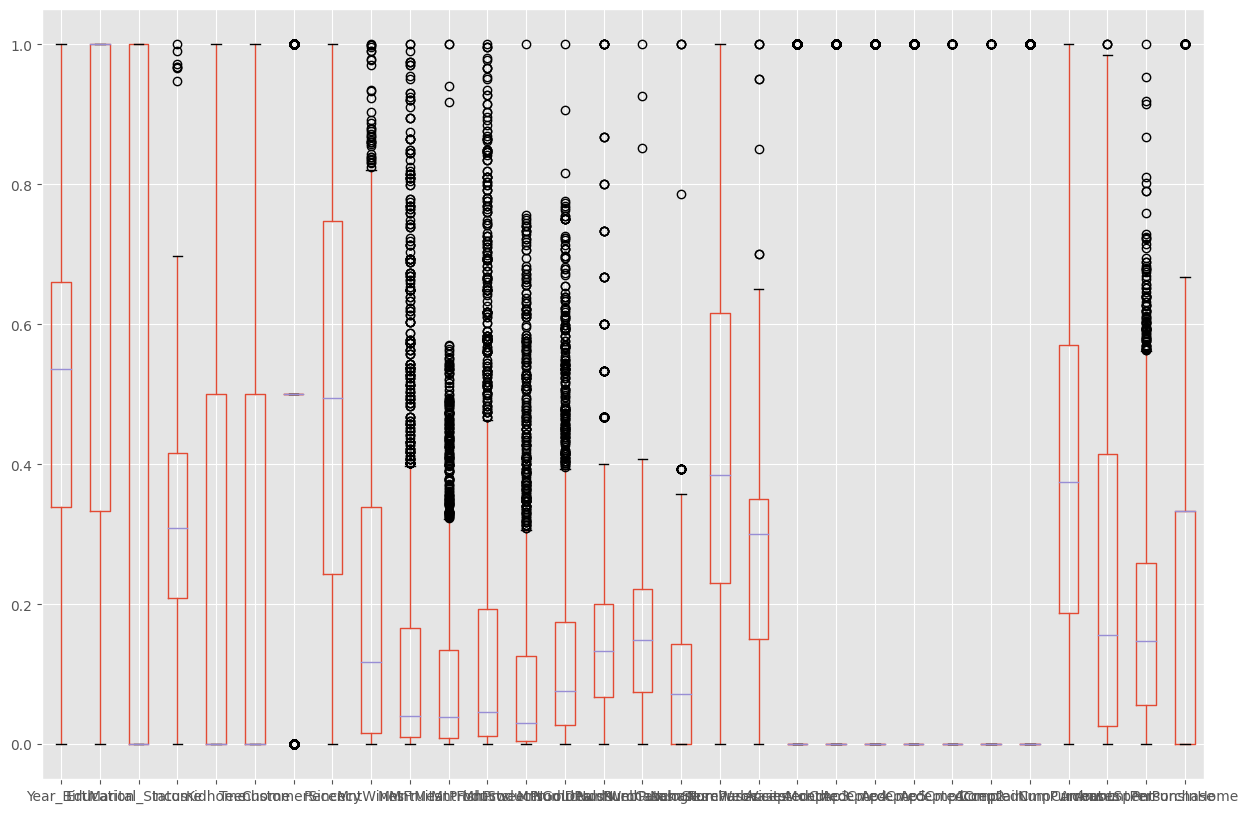

In [ ]:
def scaling_func(df: pd.DataFrame) -> None:
  #Приводим данные типа object к числовому типу
  categorical = functionalDF.select_dtypes(include=["object"])
  le = LabelEncoder()
  for col in categorical:
    functionalDF[col] = le.fit_transform(functionalDF[col])
  mms = MinMaxScaler()
  return pd.DataFrame(data=mms.fit_transform(df), columns=df.columns)


standartedDF = scaling_func(functionalDF)
standartedDF.boxplot(figsize=(15,10))

Можно заметить, что у нас очень много различных данных. С помощью алгоритма PCA вычислим главные компонентны - наиболее значимые признаки датасета.

<Axes: >

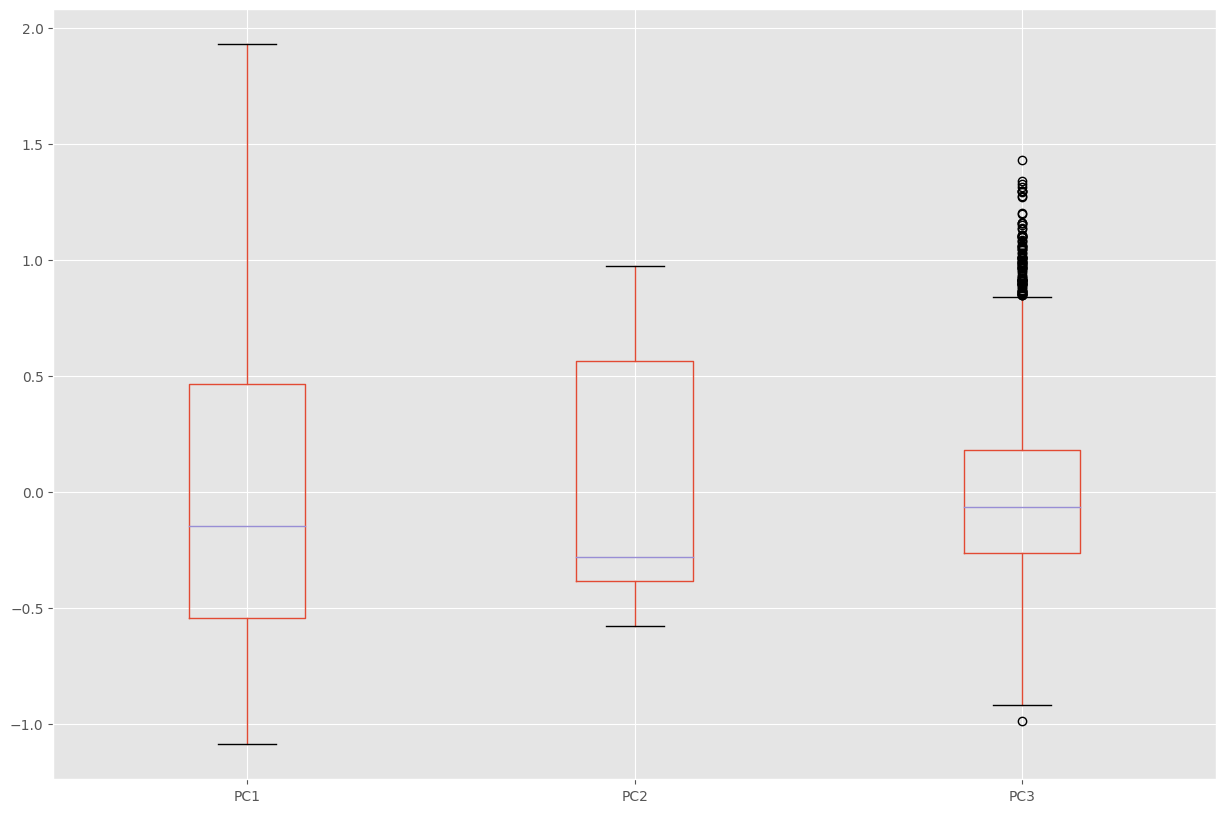

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(standartedDF)
principalDF = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3'])

principalDF.boxplot(figsize=(15,10))

Наконец мы можем переходить к класстеризации.

## **Немного об алгоритмах**

**Алгоритм K-means**

Вход: Объекты $X$, $k$ - количество кластеров
1.    **Инициализация центроидов** $\mu_1, \mu_2, ..., \mu_k$
2.    **Обновление кластеров:** объекты приписываются к ближайшему центроиду
3.    **Обновление центроидов:** пересчет положения центроидов как центр масс объектов, которые лежат в соответствующем кластере

Шаги 2 и 3 продолжаются до тех пор пока не выполнятся некоторые правила остановок, например, будет достигнуто какое-то максимальное количество итераций или пока кластеры не перестанут меняться.

Визуализация алгоритма:

In [ ]:
Image(url= "https://stanford.edu/~cpiech/cs221/img/kmeansViz.png", width=600)

Сильные стороны алгоритма:

* Сравнительно высокая эффективность при простоте реализации
* Высокое качество кластеризации
* Возможность распараллеливания
* Существование множества модификаций

Недостатки алгоритма:

* Количество кластеров является параметром алгоритма
* Чувствительность к начальным условиям (Инициализация центров кластеров в значительной степени влияет на результат кластеризации)
* Чувствительность к выбросам и шумам (Выбросы, далекие от центров настоящих кластеров, все равно учитываются при вычислении их центров)
* Возможность сходимости к локальному оптимуму (Итеративный подход не дает гарантии сходимости к оптимальному решению)
* Использование понятия "среднего" (Алгоритм неприменим к данным, для которых не определено понятие "среднего", например, категориальным данным)
* слабая классификация сложных данных (ленточных кластеров, вложенных, пересекающихся и т.д.)

**Алгоритм DBSCAN**

DBSCAN (Density-based spatial clustering of applications with noise, плотностной алгоритм пространственной кластеризации с присутствием шума), как следует из названия, оперирует плотностью данных.

Суть метода (максимально упрощенно):
Перед лекцией несколько групп студентов находятся в коридоре и ждут, когда освободится аудитория. Предположим, каждый студент - это отдельная точка. Кто-то стоит один, кто-то кучкуется группой, кто-то стоит вдоль стен. Как же выделить в такой толпе кластеры?
Находим трёх любых близко стоящих человека и говорим им взяться за руки. Затем они начинают брать за руку тех, до кого могут дотянуться. Так по цепочке, пока никто больше не сможет взять кого-то за руку — это и будет первый кластер. Повторяем, пока не поделим всех. Те, кому вообще некого брать за руку — это выбросы, аномалии.


Визуализация этого метода на примере не очень простых данных. Цветом выделены разные кластеры, выбросы (точки, не вошедшие ни в один кластер) остались неокрашенными.
![dbscanUrl](https://cdn-images-1.medium.com/max/1600/1*tc8UF-h0nQqUfLC8-0uInQ.gif "DBSCAN")

Значительное влияние на работу алгоритма DBSCAN оказывают два его входных параметра: eps -радиус окрестности (это максимальное расстояние на котором две точки считаются соседями и могут быть отнесены к одному кластеру) и min_samples - минимальное количество точек, образующих кластер. Подбор этих параметров - важная часть настройки данного метода. Посмотрим это на примере небольшого набора "синтетических" данных

**Преимущества**.

DBSCAN не требует априорного указания количества кластеров в данных, в отличие от k-означает.

DBSCAN может находить кластеры произвольной формы. Он даже может найти кластер, полностью окруженный (но не связанный) с другим кластером.

**Недостатки**.

Когда объем данных увеличивается, требуется больший объем памяти для поддержки потребления ввода-вывода;

Когда плотность пространственной кластеризации неравномерна и расстояние кластеризации сильно различается, качество кластеризации низкое, поскольку в этом случае трудно выбрать параметры MinPts и Eps.

(3Эффект кластеризации алгоритма зависит от выбора формулы расстояния. Евклидово расстояние обычно используется в практических приложениях. Для данных большой размерности существует «катастрофа размерности».

## **Класстеризация**

In [ ]:
clusteringDF=principalDF.copy()

K-Means

[1056.15134524211, 743.692512800628, 541.7521477151977, 387.9761287982898, 318.50988125225655, 262.82542774834724, 215.76927215020658, 182.41399121185]


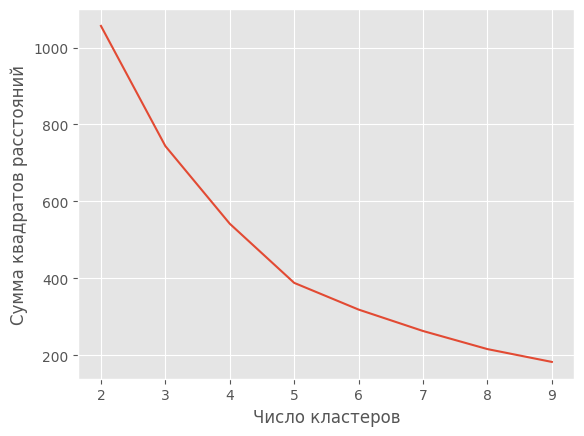

In [ ]:
X = clusteringDF[['PC1', 'PC2','PC3']].iloc[: , :].values
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
print(criteries)
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.plot(range(2,10), criteries)


Как можно видеть по графику имеет смысл рассматривать 5 класстеров.

In [ ]:

kmeans = KMeans(n_clusters=5)
kmeans.fit(principalDF)

clusteringDF['predictions'] = kmeans.labels_
fig = px.scatter_3d(clusteringDF, x='PC1', y='PC2', z='PC3', color='predictions',
                      color_discrete_sequence=px.colors.qualitative.Bold, opacity=0.5)
fig.update_traces(marker_size = 2.5)
fig.update_layout(title_text="KMeans Clustering K=5", title_x=0.5)
fig.show()

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=6)
dbscan.fit_predict(clusteringDF)

clusteringDF['predictions'] = dbscan.labels_
fig = px.scatter_3d(clusteringDF, x='PC1', y='PC2', z='PC3', color='predictions',
                      color_discrete_sequence=px.colors.qualitative.Bold, opacity=0.5)
fig.update_traces(marker_size = 2.5)
fig.update_layout(title_text="DBSCAN clustering", title_x=0.5)
fig.show()


Алгоритм DBSCAN не помог нам в выполнении задачи разумной кластеризации наших данных. Он создал множество кластеров, не имеющих никакого отношения друг к другу. Поэтому в дальнейшем будем использовать данные от K-Means.

Добавим каждому элементу исходного датафрейма его класстер.



In [ ]:
df['Cluster'] = kmeans.labels_
functionalDF['Cluster'] = kmeans.labels_
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,CustomerSince,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmpCurrent,Cluster
0,1957,UnderGraduate,Single,58138.0,0,0,2012,58,635,88,...,4,7,0,0,0,0,0,0,1,4
1,1954,UnderGraduate,Single,46344.0,1,1,2014,38,11,1,...,2,5,0,0,0,0,0,0,0,3
2,1965,UnderGraduate,In Relationship,71613.0,0,0,2013,26,426,49,...,10,4,0,0,0,0,0,0,0,1
3,1984,UnderGraduate,In Relationship,26646.0,1,0,2014,26,11,4,...,4,6,0,0,0,0,0,0,0,2
4,1981,PhD,In Relationship,58293.0,1,0,2014,94,173,43,...,6,5,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,UnderGraduate,In Relationship,61223.0,0,1,2013,46,709,43,...,4,5,0,0,0,0,0,0,0,1
2236,1946,PhD,In Relationship,64014.0,2,1,2014,56,406,0,...,5,7,0,0,0,1,0,0,0,2
2237,1981,UnderGraduate,Single,56981.0,0,0,2014,91,908,48,...,13,6,0,1,0,0,0,0,0,0
2238,1956,Master,In Relationship,69245.0,0,1,2014,8,428,30,...,10,3,0,0,0,0,0,0,0,1


## **Анализ класстеризации**

На предыдущем шаге мы разбили наши объекты на классы - давайте их проанализируем.

Посмотрим на размер класстеров.

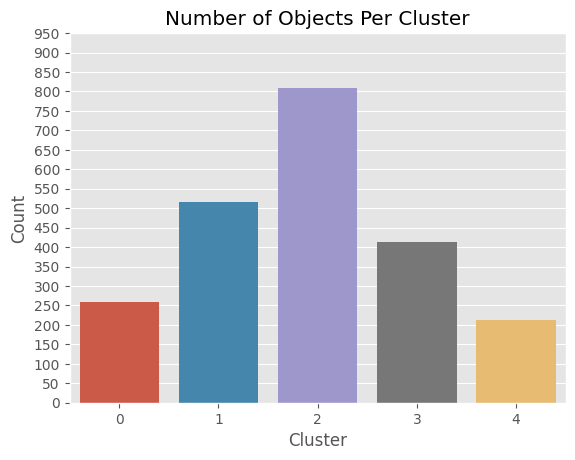

In [ ]:
sns.countplot(data=df, x='Cluster');
plt.title("Number of Objects Per Cluster");
plt.xlabel("Cluster");
plt.ylabel("Count");
plt.yticks(list(range(0,951, 50)));
plt.ylim([0,950]);

Самым большим по размеру является 2 класстер.

Узнаем распределение возраста по классам.

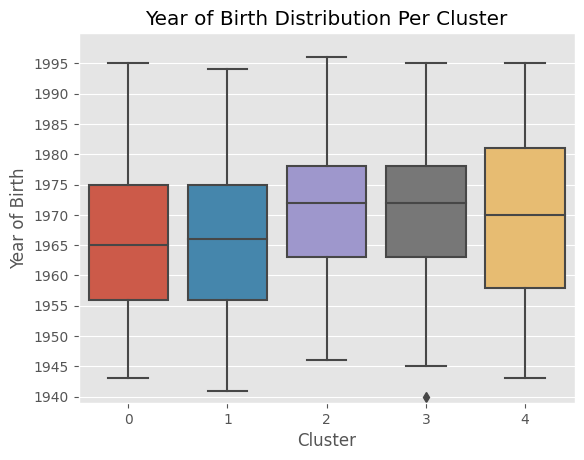

In [ ]:
sns.boxplot(data=df, y='Year_Birth', x='Cluster');
plt.title("Year of Birth Distribution Per Cluster");
plt.xlabel("Cluster");
plt.ylabel("Year of Birth");
plt.yticks(list(range(1935,2000, 5)))
plt.ylim([1939,2000]);

Что насчет уровня образования?

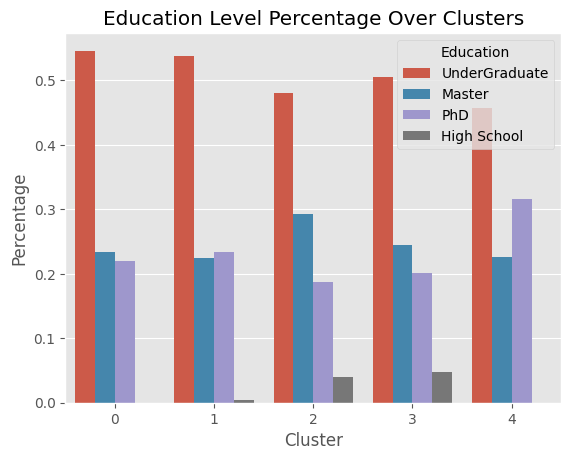

In [ ]:
counted = df.groupby('Cluster').Education.value_counts(normalize=True).reset_index(name="percentage")
counted
sns.barplot(data=counted, x='Cluster', y='percentage', hue='Education');
plt.title("Education Level Percentage Over Clusters");
plt.xlabel("Cluster");
plt.ylabel("Percentage");


Доминирующим уровнем во всех кластерах является бакалавриат. Однако, несмотря на то, что 3-й кластер в меньше 1-го по размеру, в нем больше учеников старших классов школы. Кластер 2 содержит самый высокий процент выпускников магистратуры. В кластере 4 процент обладателей докторских степеней выше, чем в других.

Выясним информацию о доходе.

In [ ]:
amount = df.groupby('Cluster').Income.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Income Per Group', title_x=0.5)

Кластер 4 имеет наибольший доход - 75 00 долларов в год. За ним следует кластер 1 с доходом в 69 000 долларов. Группа с наименьшим годовым доходом - кластер 3, всего 36 000 долларов.

In [ ]:
amount = functionalDF.groupby('Cluster').AmountPerPurchase.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Amount Spent in a Single Purchase', title_x=0.5)

Неудивительно, что две группы с наибольшим доходом (1 и 4) также тратят больше всего - 78 и 58 долларов.

In [ ]:
grouped = functionalDF.groupby('Cluster').PersonsInHome.value_counts()
grouped

Cluster  PersonsInHome
0        3                138
         2                112
         4                  9
         5                  1
1        3                258
         2                234
         4                 23
         5                  2
2        3                454
         4                251
         2                 76
         5                 29
3        3                222
         4                128
         2                 45
         5                 18
4        2                165
         3                 42
         4                  5
Name: PersonsInHome, dtype: int64

Какие товары чаще всего покупают?

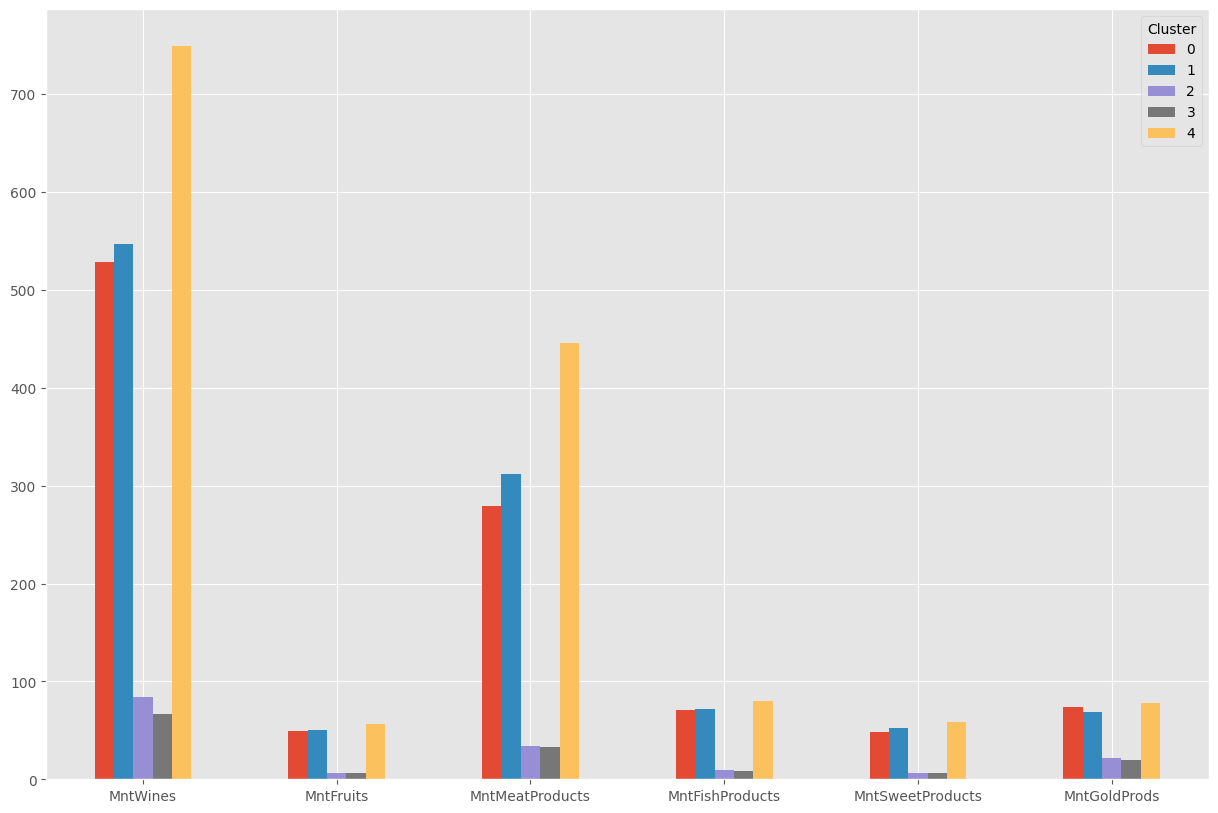

In [ ]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
accepted = df.groupby("Cluster")[cols].mean().T
accepted.plot(kind='bar', rot=0,figsize=(15,10));

Какая группа в среднем принимает больше всего рекламных акций?

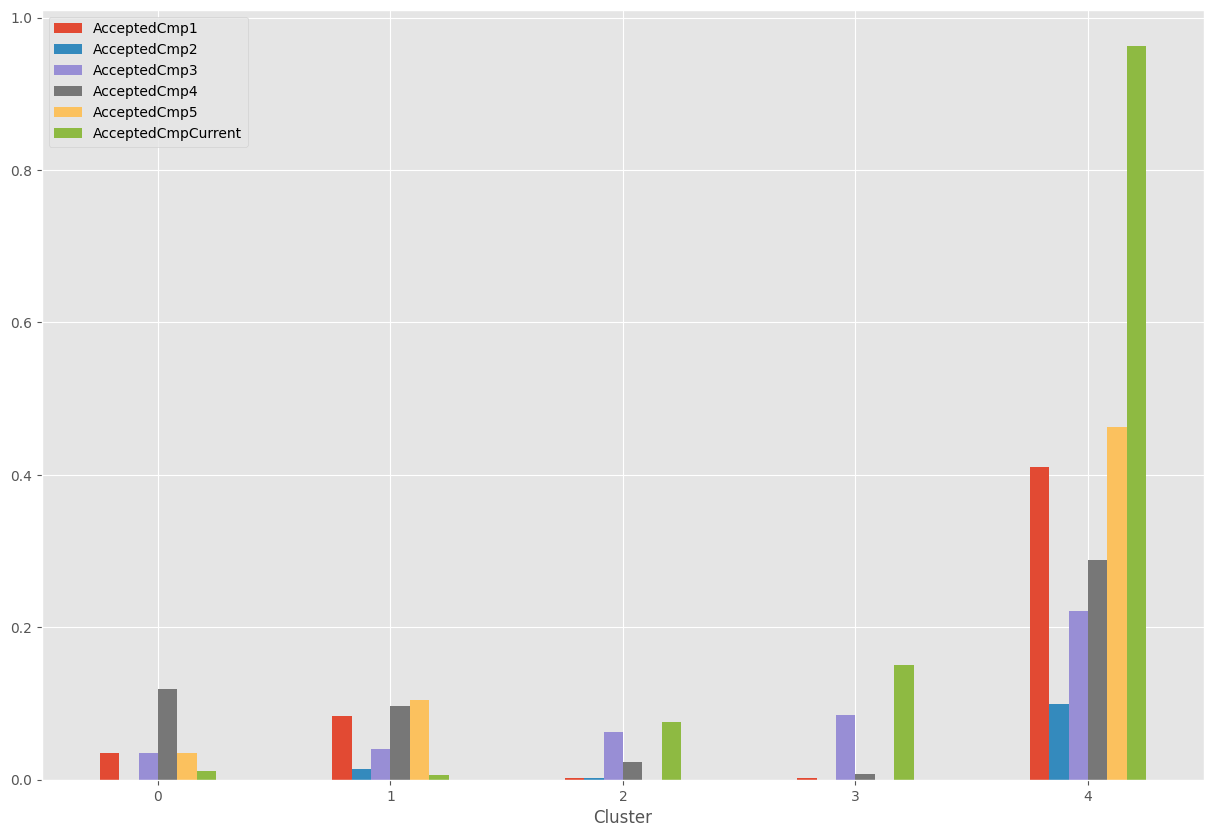

In [ ]:
accepted = df.groupby("Cluster")[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'AcceptedCmpCurrent']].mean()

accepted.plot(kind='bar', rot=0,figsize=(15,10));


Мы видим, что кластер 4 принимает значительное количество рекламных акций, гораздо больше, чем остальные. Остальные имеют высокий уровень одобрения текущей кампании, но их нельзя сравнивать с группой 3.

## **Выводы**

В ходе этого исследования мы проанализировали данные о клиентах, затем провели их сегментацию. Получилось 5 классов клиентов. Эти классы имеют следующее описание:

Класс 0
>Четвертая по величине группа

>Большинство из них имеют степень бакалавра

>Средний год их рождения - около 1965-го

>В их семье в среднем проживает 3 человека

>Их средний годовой доход составляет около 66 000 долларов

>Они тратят около 56 долларов в среднем на каждую покупку

>Редко реагируют на рекламу

>Высокие потребители вина и мяса

Класс 1
>Вторая по величине группа

>Большинство из них имеют степень бакалавра

>Средний год их рождения - около 1965-го

>В их семье в среднем проживает 2-3 человека

>Их средний годовой доход составляет около 69 000 долларов

>Они тратят около 58 долларов в среднем на каждую покупку

>Редко реагируют на рекламу

>Высокие потребители вина и мяса

Класс 2
>Первая по величине группа

>Большинство из них имеют степень бакалавра, большое количество учеников старших классов школы, а также наибольшее количество магистрантов.

>Средний год их рождения - около 1972-го

>В их семье в среднем проживает 3 человека

>Их средний годовой доход составляет около 34 000 долларов

>Они тратят около 17 долларов в среднем на каждую покупку

>Редко реагируют на рекламу

>Умеренные потребители всех продуктов, редко покупают фрукты, сладости и рыбу.

Класс 3
>Третья по величине группа

>Большинство из них имеют степень бакалавра, большое количество учеников старших классов школы

>Средний год их рождения - около 1972-го

>В их семье в среднем проживает 3 человека

>Их средний годовой доход составляет около 37 000 долларов

>Они тратят около 17 долларов в среднем на каждую покупку

>Иногда реагируют на рекламу

>Умеренные потребители всех продуктов, редко покупают фрукты, сладости и рыбу.

Класс 4
>Пятая по величине группа

>Большинство из них имеют степень бакалавра, большое количество людей с ученой степенью

>Средний год их рождения - около 1970-го

>В их семье в среднем проживает 3 человека

>Их средний годовой доход составляет около 75 000 долларов

>Они тратят около 78 долларов в среднем на каждую покупку

>Часто реагируют на рекламу

>Самые большие потребители мяса, рыбы и фруктов. Высокие потребители вина
